# Run or Walk Classification 

https://www.kaggle.com/vmalyi/run-or-walk/

Created by Viktor Malyi

It represents 88588 sensor data samples collected from **accelerometer** and **gyroscope** from iPhone 5c in 10 seconds interval and ~5.4/second frequency. This data is represented by following columns (each column contains sensor data for one of the sensor's axes):
- acceleration_x
- acceleration_y
- acceleration_z
- gyro_x
- gyro_y
- gyro_z

There is an **activity type** represented by "activity" column which acts as label and reflects following activities:
- "0": walking
- "1": running

Apart of that, the dataset contains "wrist" column which represents the **wrist** where the device was placed to collect a sample on:
- "0": left wrist
- "1": right wrist

Additionally, the dataset contains "date", "time" and "username" columns which provide information about the **exact date**, **time** and **user** which collected these measurements.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('dataset.csv', encoding='utf-8')
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


## Data Exploration

In [3]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

### Usermame

In [4]:
data.username.value_counts()

viktor    88588
Name: username, dtype: int64

Only one person's data is includede in the dataset, therefore this feature may be ignored. 

In [5]:
data = data.drop(columns=["username"])

### Activity

In [6]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [7]:
run = data[data.activity == 1]
walk = data[data.activity == 0]

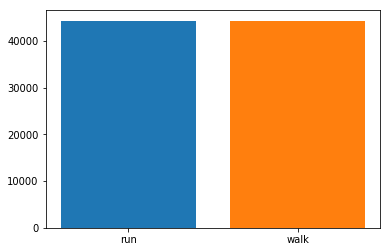

In [8]:
plt.bar(0, height=[run.activity.count()])
plt.bar(1, height=[walk.activity.count()])
plt.xticks(np.arange(2), ['run', 'walk'])
plt.show()

### Wrist

In [9]:
data.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

In [10]:
right = data[data.wrist == 1]
left = data[data.wrist == 0]

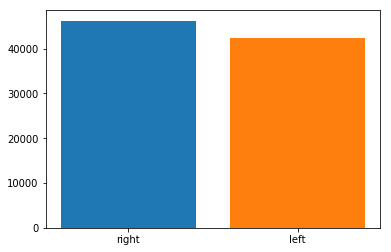

In [11]:
plt.bar(0, height=[right.wrist.count()])
plt.bar(1, height=[left.wrist.count()])
plt.xticks(np.arange(2), ['right', 'left'])
plt.show()

### Date and Time

In [12]:
# time franction is too large 
data.time = data.time.apply(lambda x: x[:-3]) 

In [13]:
# combine date and time in one feature
data["datetime"] = data.date + ' ' + data.time
data.datetime = data.datetime.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S:%f'))
data = data.drop(columns=["date", "time"])

In [14]:
# data["timestamp"] = data.datetime.apply(lambda x: x.timestamp())

In [15]:
# set new index datetime and round its values up to seconds
data = data.set_index('datetime')
data = data.set_index(data.index.round('s'))
data.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,
2017-06-30 13:51:16,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
2017-06-30 13:51:16,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2017-06-30 13:51:16,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
2017-06-30 13:51:17,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
2017-06-30 13:51:17,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


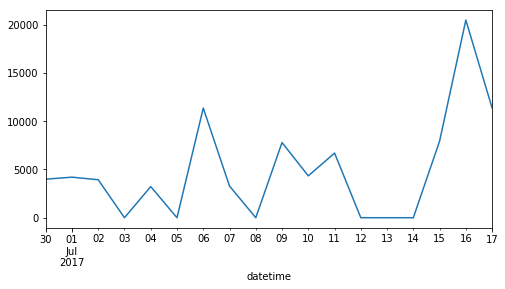

In [16]:
data.activity.resample('D').count().plot(figsize=(8, 4))

The graph above shows how many samples were collected through time

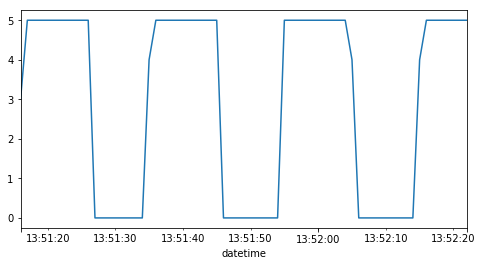

In [17]:
data.iloc[:200].activity.resample('s').count().plot(figsize=(8, 4))

The graph above show the frequentcy of collected data from accelerometer and gyroscope (first 200 samples)

In [18]:
grouped_by_time = data.activity.groupby(by=[data.index.date, data.index.time])
grouped_by_time_count = grouped_by_time.agg("count")
grouped_by_time_count.value_counts().sort_values(ascending=False)

5    16050
4     1710
1      178
3      171
2      130
6       90
7        1
Name: activity, dtype: int64

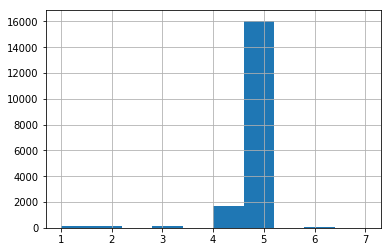

In [19]:
grouped_by_time_count.hist()

The graph above shows frequency of collected samples per second

### Accelerometer and Gyroscope Sensors

In [20]:
sensors = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [21]:
plot_data_size = 20
walk_plot = walk.head(plot_data_size)
run_plot = run.head(plot_data_size)

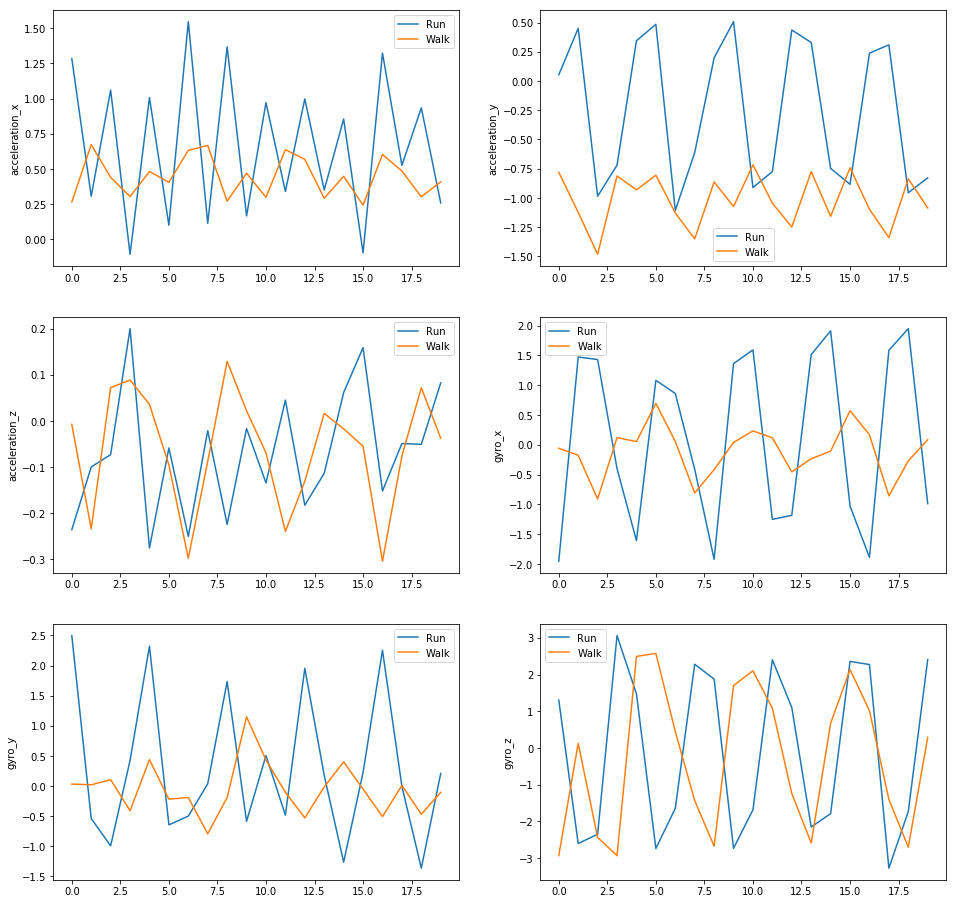

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
for i, ax in enumerate(axes.flatten()[:6]):
    c = sensors[i]
    ax.plot(range(0, plot_data_size), run_plot[c], label="Run")
    ax.plot(range(0, plot_data_size), walk_plot[c], label="Walk")
    ax.set_ylabel(c)
    ax.legend()

### Run and Walk Patterns

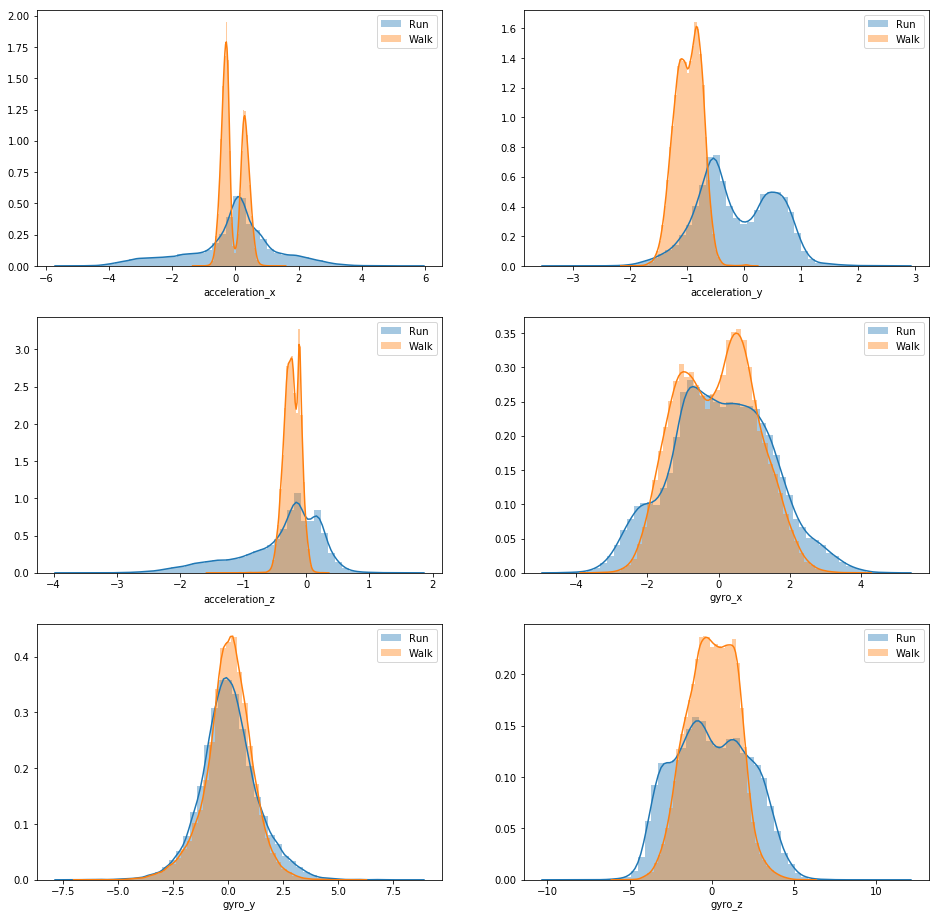

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
for i, ax in enumerate(axes.flatten()[:6]):
    c = sensors[i]
    sns.distplot(run[c], ax=ax, label='Run')
    sns.distplot(walk[c], ax=ax, label='Walk')
    ax.legend()

### Right and Left Wrist Patterns

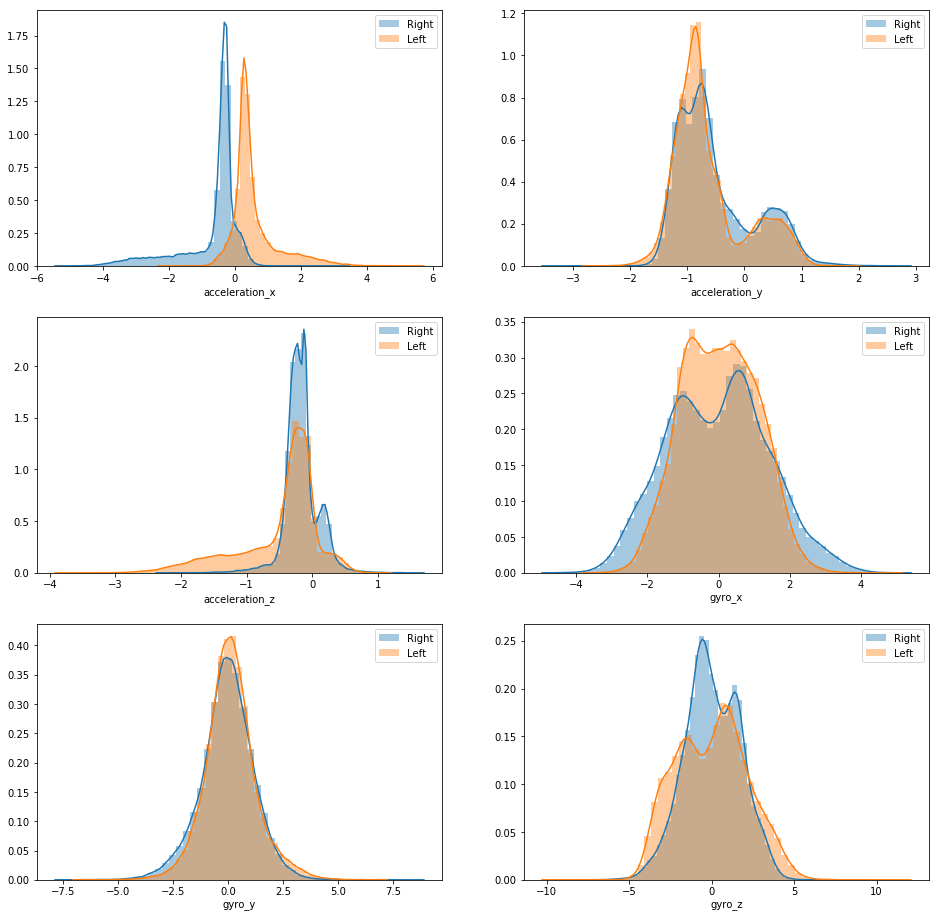

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
for i, ax in enumerate(axes.flatten()[:6]):
    c = sensors[i]
    sns.distplot(right[c], ax=ax, label='Right')
    sns.distplot(left[c], ax=ax, label='Left')
    ax.legend()

## Train a Model

In [25]:
X = data[:]
y = X.pop("activity")

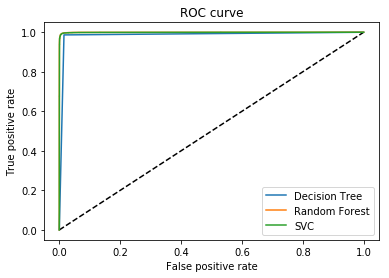

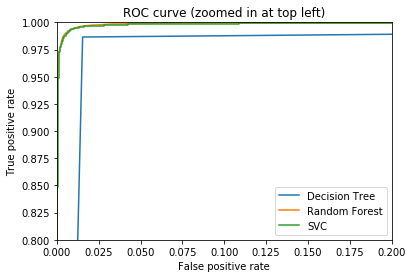

Accuracy scores
Decision Tree: 0.9855575973852346
Random Forest: 0.9993994430370692
SVC: 0.9992018237807995


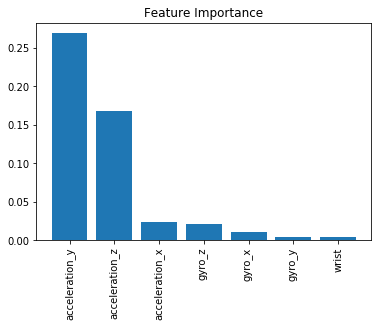

In [26]:
from roc_auc_results import print_results
print_results(X, y)

## Experiment: Group Samples by Second

The example above demonstrates a trained model on data from sensors being at certain positions. But running and walking is moving. We might have misclassified items only because some positions of a sensor is common for both running and walking. Theoretically, to achieve higher accuracy, we need to trace how these parameters change through time. In this experiment, I am trying to estimate how sensor parameters change within one second to classify running or walking. 

In [27]:
# drop wrist feature for simplisity 
data = data.drop(columns=["wrist"])
data.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,
2017-06-30 13:51:16,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
2017-06-30 13:51:16,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2017-06-30 13:51:16,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
2017-06-30 13:51:17,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
2017-06-30 13:51:17,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [28]:
# group by date, time, and activity
group = data.groupby(by=[data.index.date, data.index.time, data.activity])
group.first()

acceleration_x  acceleration_y  acceleration_z  \
                    activity                                                   
2017-06-30 13:51:16 0                 0.2650         -0.7814         -0.0076   
           13:51:17 0                 0.3031         -0.8125          0.0888   
           13:51:18 0                 0.2704         -0.8633          0.1293   
           13:51:19 0                 0.2911         -0.7748          0.0163   
           13:51:20 0                 0.3017         -0.8366          0.0718   
           13:51:21 0                 0.3275         -0.7846         -0.0344   
           13:51:22 0                 0.2843         -0.9344         -0.0459   
           13:51:23 0                 0.4053         -0.7735         -0.0511   
           13:51:24 0                 0.5762         -1.1338         -0.0781   
           13:51:25 0                 0.4872         -1.1931         -0.0351   
           13:51:26 0                 0.7001         -1.1561         -0.1305   
           13:51:35 0                 0.6929         -1.1423         -0.1246   
           13:51:36 0                 0.3874         -0.6626         -0.1261   
           13:51:37 0                 0.5353         -0.8067         -0.1952   
           13:51:38 0                 0.2549         -0.8386         -0.0392   
           13:51:39 0                 0.2652         -0.7821         -0.0957   
           13:51:40 0                 0.5972         -1.1432         -0.2235   
           13:51:41 0                 0.5658         -1.1213         -0.2999   
           13:51:42 0                 0.4465         -1.0840         -0.1606   
           13:51:43 0                 0.4655         -0.9433         -0.1292   
           13:51:44 0                 0.3964         -0.9407          0.0009   
           13:51:45 0                 0.4304         -1.0449          0.0086   
           13:51:55 0                 0.3904         -1.0966          0.0865   
           13:51:56 0                 0.3146         -0.8448         -0.2048   
           13:51:57 0                 0.3771         -0.8419         -0.0954   
           13:51:58 0                 0.4888         -1.0419         -0.0523   
           13:51:59 0                 0.5259         -1.2524         -0.1105   
           13:52:00 0                 0.6005         -1.4198         -0.0493   
           13:52:01 0                 0.5268         -1.3036         -0.1140   
           13:52:02 0                 0.5617         -1.3276         -0.1674   
...                                      ...             ...             ...   
2017-07-17 20:15:35 1                -0.7510         -0.1079          0.0551   
           20:15:36 1                -0.3037          0.9913         -0.1569   
           20:15:37 1                -1.7945          0.8755         -0.1638   
           20:15:38 1                 0.1507         -0.5472          0.2029   
           20:15:39 1                -3.1720         -0.3184          0.1747   
           20:15:40 1                 0.3033          0.6249         -0.2086   
           20:15:41 1                -1.9567          0.0532          0.0342   
           20:15:42 1                -0.0189         -0.4627          0.1820   
           20:15:43 1                -2.0733          0.4466          0.0836   
           20:15:44 1                -0.7586          0.4447          0.0160   
           20:15:45 1                -2.4059          0.7482          0.0804   
           20:15:46 1                -3.2348         -0.3874          0.3367   
           20:15:47 1                 0.0772          0.8907         -0.1024   
           20:15:48 1                -1.3607         -0.2012          0.2527   
           20:15:49 1                 0.2846         -0.7084          0.2598   
           20:15:50 1                -1.4613          0.9534         -0.0486   
           20:15:51 1                -1.0897          0.4899         -0.0402   
           20:15:52 1         

In [29]:
# find max, min, and mean for each second
group_agg = group.agg([np.max, np.min, np.mean]).rename(columns={'amax': 'max', 'amin': 'min'})
group_agg.head(5)

acceleration_x                   acceleration_y  \
                                        max     min      mean            max   
                    activity                                                   
2017-06-30 13:51:16 0                0.6722  0.2650  0.459033        -0.7814   
           13:51:17 0                0.6670  0.3031  0.497580        -0.8056   
           13:51:18 0                0.6364  0.2704  0.448520        -0.7172   
           13:51:19 0                0.6028  0.2424  0.413840        -0.7421   
           13:51:20 0                0.7090  0.3017  0.485440        -0.7532   

                                              acceleration_z                   \
                                 min     mean            max     min     mean   
                    activity                                                    
2017-06-30 13:51:16 0        -1.4817 -1.12880         0.0722 -0.2344 -0.05660   
           13:51:17 0        -1.3503 -1.00572         0.0888 -0.2982 -0.07142   
           13:51:18 0        -1.2486 -0.98966         0.1293 -0.2400 -0.05782   
           13:51:19 0        -1.3397 -1.02212         0.0163 -0.3046 -0.08734   
           13:51:20 0        -1.1893 -0.93680         0.0718 -0.2972 -0.14622   

                              gyro_x                    gyro_y          \
                                 max     min      mean     max     min   
                    activity                                             
2017-06-30 13:51:16 0        -0.0590 -0.9105 -0.381733  0.1063  0.0208   
           13:51:17 0         0.6925 -0.8094  0.022100  0.4379 -0.7938   
           13:51:18 0         0.2326 -0.4556 -0.097040  1.1491 -0.5281   
           13:51:19 0         0.5714 -0.8579 -0.092340  0.4016 -0.5065   
           13:51:20 0         0.3006 -0.2701 -0.019820  0.1531 -1.4683   

                                       gyro_z                    
                                 mean     max     min      mean  
                    activity                                     
2017-06-30 13:51:16 0         0.05320  0.1269 -2.9296 -1.746467  
           13:51:17 0        -0.23466  2.5750 -2.9336  0.229220  
           13:51:18 0         0.15188  2.1009 -2.6759  0.192940  
           13:51:19 0        -0.03214  2.1356 -2.5884 -0.033740  
           13:51:20 0        -0.41650  2.6873 -2.7010  0.092400

In [30]:
group_agg.isnull().sum()

acceleration_x  max     0
                min     0
                mean    0
acceleration_y  max     0
                min     0
                mean    0
acceleration_z  max     0
                min     0
                mean    0
gyro_x          max     0
                min     0
                mean    0
gyro_y          max     0
                min     0
                mean    0
gyro_z          max     0
                min     0
                mean    0
dtype: int64

In [31]:
# reset group
group_reseted = group_agg.reset_index(level='activity').reset_index(drop=True)
group_reseted.head()

activity acceleration_x                   acceleration_y                   \
                      max     min      mean            max     min     mean   
0        0         0.6722  0.2650  0.459033        -0.7814 -1.4817 -1.12880   
1        0         0.6670  0.3031  0.497580        -0.8056 -1.3503 -1.00572   
2        0         0.6364  0.2704  0.448520        -0.7172 -1.2486 -0.98966   
3        0         0.6028  0.2424  0.413840        -0.7421 -1.3397 -1.02212   
4        0         0.7090  0.3017  0.485440        -0.7532 -1.1893 -0.93680   

  acceleration_z                   gyro_x                    gyro_y          \
             max     min     mean     max     min      mean     max     min   
0         0.0722 -0.2344 -0.05660 -0.0590 -0.9105 -0.381733  0.1063  0.0208   
1         0.0888 -0.2982 -0.07142  0.6925 -0.8094  0.022100  0.4379 -0.7938   
2         0.1293 -0.2400 -0.05782  0.2326 -0.4556 -0.097040  1.1491 -0.5281   
3         0.0163 -0.3046 -0.08734  0.5714 -0.8579 -0.092340  0.4016 -0.5065   
4         0.0718 -0.2972 -0.14622  0.3006 -0.2701 -0.019820  0.1531 -1.4683   

            gyro_z                    
      mean     max     min      mean  
0  0.05320  0.1269 -2.9296 -1.746467  
1 -0.23466  2.5750 -2.9336  0.229220  
2  0.15188  2.1009 -2.6759  0.192940  
3 -0.03214  2.1356 -2.5884 -0.033740  
4 -0.41650  2.6873 -2.7010  0.092400

In [32]:
data.shape

(88588, 7)

In [33]:
group_reseted.shape

(18330, 19)

## Train a Model

In [34]:
X_grp = group_reseted[:]
y_grp = X_grp.pop("activity")

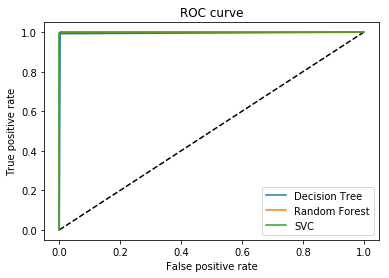

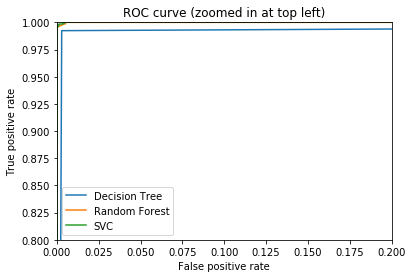

Accuracy scores
Decision Tree: 0.9947293146931812
Random Forest: 0.9999861106297598
SVC: 0.9999900790212571


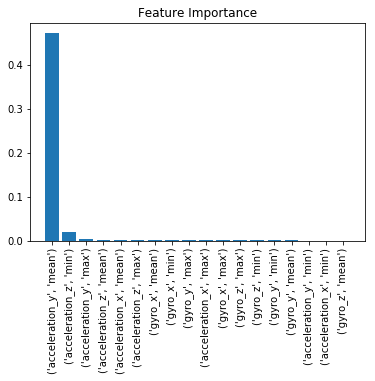

In [35]:
print_results(X_grp, y_grp)

## Conclusion 

- I could achieve 0.9998 accuracy score using this Support Vector Machine model. Another one with 0.9997 accuracy score was RandomForest. 
- The experiment with grouping samples y second was successful. I could achieve improvement in accuracy score in 0.001
- Since I had data recorded only from one person, I don't know how patterns are different for different people. It requires future investigation. 